## ***`CONTEXT:`*** *Welcome to the Scaler Healthcare data analysis team! As part of our ongoing efforts to understand and combat obesity globally, we are leveraging data to gain insights into factors contributing to obesity. we have been tasked with analysing the Obesity Dataset, applying the k-Nearest Neighbours (kNN) algorithm to predict obesity levels based on individuals' eating habits and physical conditions.*

### ***`DATASET DESCRIPTION:`***

#### *The dataset you'll be working with contains attributes related to individuals' eating habits and physical conditions. Here's a breakdown of the features you'll encounter:*

### **Eating Habits Attributes:**
#### **`1. FAVC (Frequent consumption of high caloric food):`** Indicates if the individual frequently eats high caloric food.
#### **`2. FCVC (Frequency of consumption of vegetables):`** Reflects how often the individual consumes vegetables.
#### **`3. NCP (Number of main meals):`** Represents the number of main meals the individual has in a day.
#### **`4. CAEC (Consumption of food between meals):`** Shows how frequently the individual eats between meals.
#### **`5. CH20 (Consumption of water daily):`** Details the daily water consumption.
#### **`6. CALC (Consumption of alcohol):`** Provides information on the individual's alcohol consumption.

### **Physical Condition Attributes:**
#### **`7. SCC (Calories consumption monitoring):`** Indicates if the individual monitors their calorie intake.
#### **`8. FAF (Physical activity frequency):`** Reflects the frequency of physical activity.
#### **`9. TUE (Time using technology devices):`** Denotes the time spent using technology devices.
#### **`10. MTRANS (Transportation used):`** Details the primary mode of transportation.

In [1]:
# Import Libraries
import pandas as pd

# Load Dataset
df_knn = pd.read_csv("ObesityDataSet.csv")
print(f"The Random 10 rows of the Obesity Dataset:\n")
df_knn.sample(10)

The Random 10 rows of the Obesity Dataset:



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1256,Male,18.000000,1.791174,108.960600,yes,yes,2.000000,1.086870,Sometimes,no,2.279124,no,1.000000,1.609773,no,Public_Transportation,Obesity_Type_I
1788,Male,24.053310,1.872561,121.471077,yes,yes,2.808027,2.683061,Sometimes,no,2.640483,no,1.280191,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
373,Female,21.000000,1.540000,56.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,2.000000,Sometimes,Public_Transportation,Normal_Weight
595,Male,17.210933,1.819557,58.325122,yes,yes,2.559600,4.000000,Sometimes,no,2.000000,no,2.000000,0.331483,no,Automobile,Insufficient_Weight
540,Female,19.880360,1.670635,49.742931,no,no,2.886260,3.559841,Frequently,no,1.632004,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1895,Female,25.999185,1.568543,102.000122,yes,yes,3.000000,3.000000,Sometimes,no,1.000544,no,0.001297,1.000000,Sometimes,Public_Transportation,Obesity_Type_III
1887,Female,25.967730,1.603404,105.031908,yes,yes,3.000000,3.000000,Sometimes,no,1.919473,no,0.027101,0.546137,Sometimes,Public_Transportation,Obesity_Type_III
160,Male,20.000000,1.830000,72.000000,yes,no,3.000000,3.000000,Sometimes,yes,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
426,Male,22.000000,1.750000,70.000000,no,no,2.000000,3.000000,Sometimes,no,3.000000,no,1.000000,1.000000,no,Public_Transportation,Normal_Weight
1917,Female,21.768153,1.764160,133.888629,yes,yes,3.000000,3.000000,Sometimes,no,2.325020,no,1.441791,0.918468,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
print(f"**Shape of the Dataset:** {df_knn.shape}\n")
print(f"**Information from the Dataset**: {df_knn.info()}\n")
print(f"**Dataset Statistics**:- \n")
df_knn.describe()

**Shape of the Dataset:** (2111, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [3]:
# Check for Duplicate Values in the Dataset
print(f"Total Number of Duplicates in Dataset: {df_knn.duplicated().sum()}\n")

# Spread of Duplicataes across Features in the Dataset
print(f"Unique Featues across Dataset:\n{df_knn.nunique()}")

Total Number of Duplicates in Dataset: 24

Unique Featues across Dataset:
Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


### ***-->> `Analysing Skewness in the Obesity Dataset`***

#### ***`Context:`*** *We are tasked with exploring the Obesity dataset to understand the distribution of various features, especially focusing on skewness. This analysis is crucial for applying the kNN algorithm effectively.*

#### ***`Dataset:`*** *The dataset includes attributes related to individuals' eating habits and physical conditions. We'll examine these features to identify any right-skewness and explore the relationship between the mean, median, and mode for those features.*

#### ***`Task:`*** *Our goal is to perform Exploratory Data Analysis (EDA) to identify which of the given features are right-skewed. For any right-skewed feature, we should determine how the mean, median, and mode relate to each other.*

In [4]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt

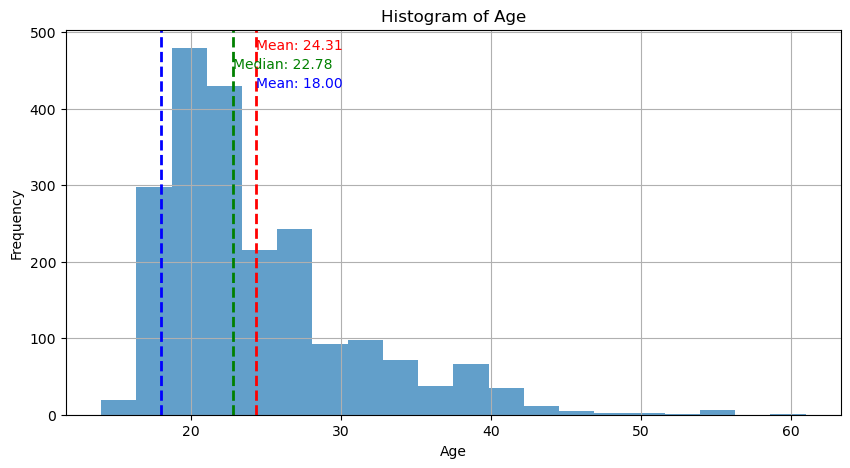

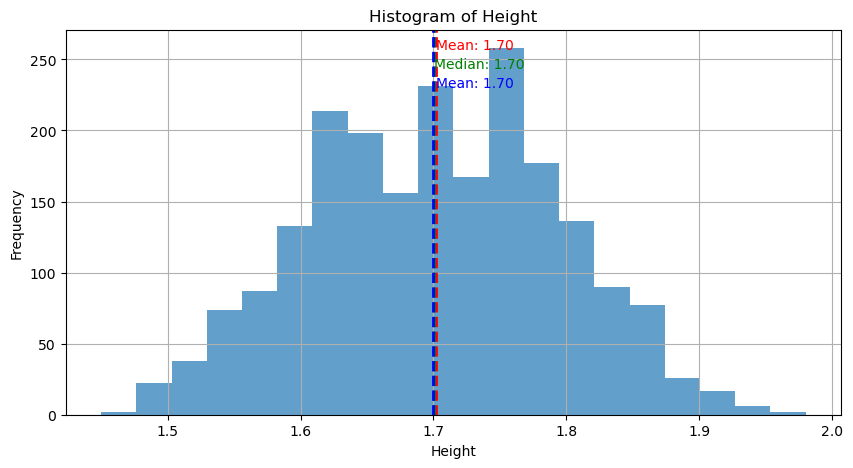

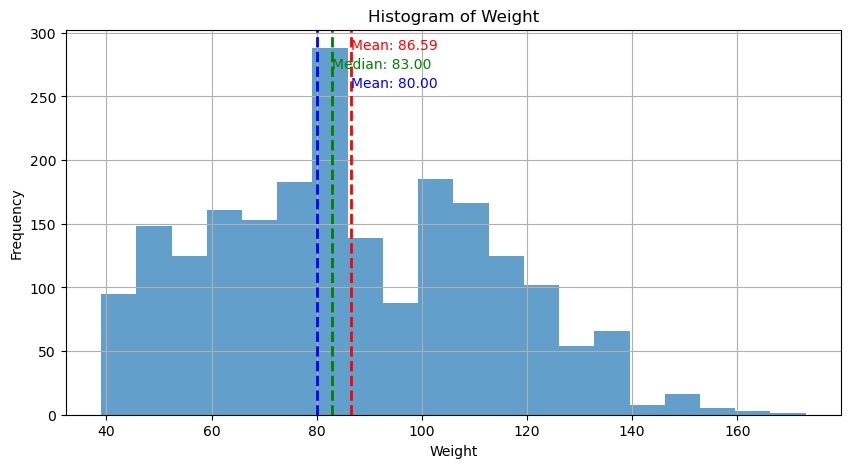

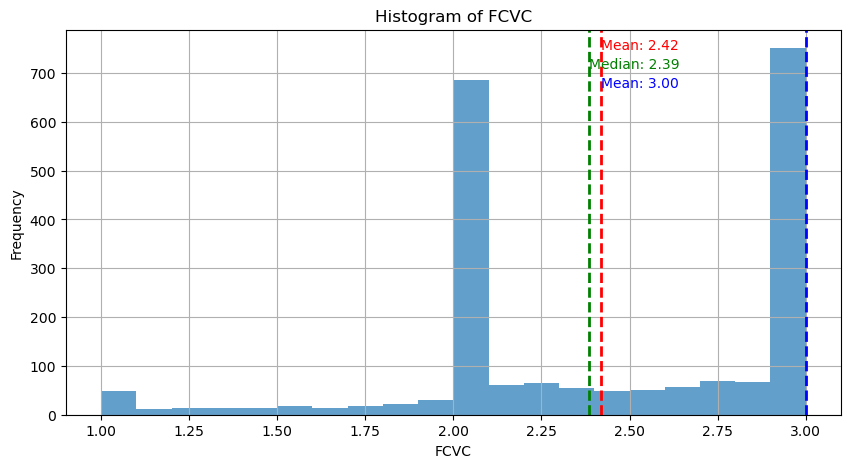

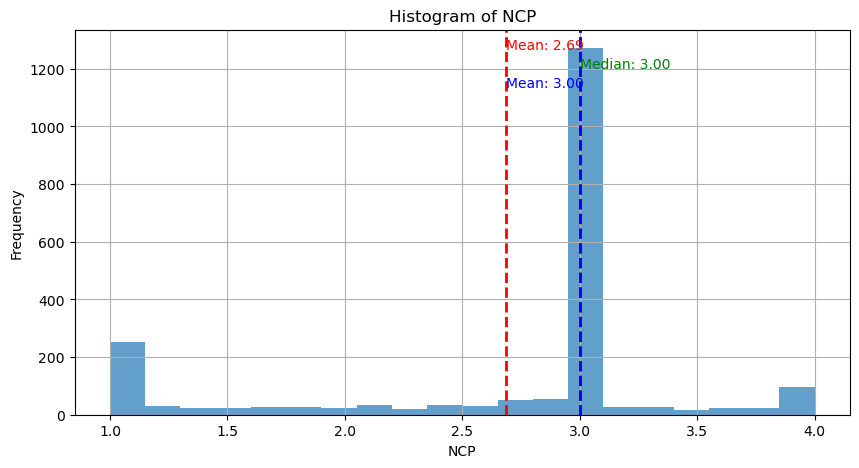

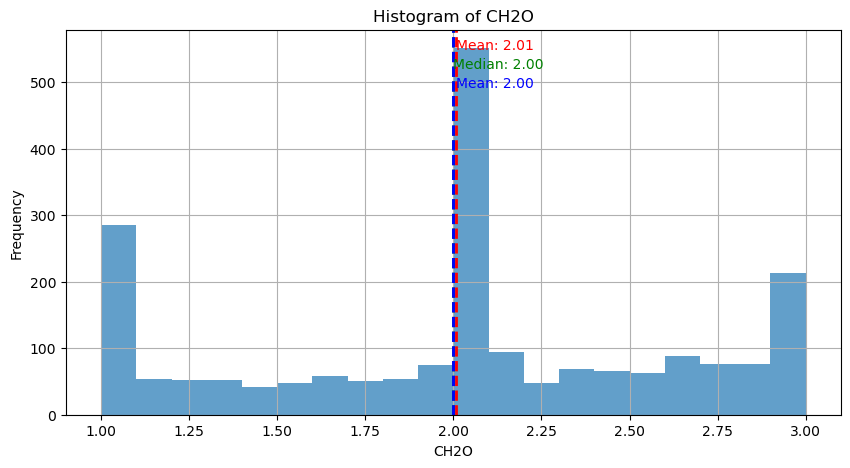

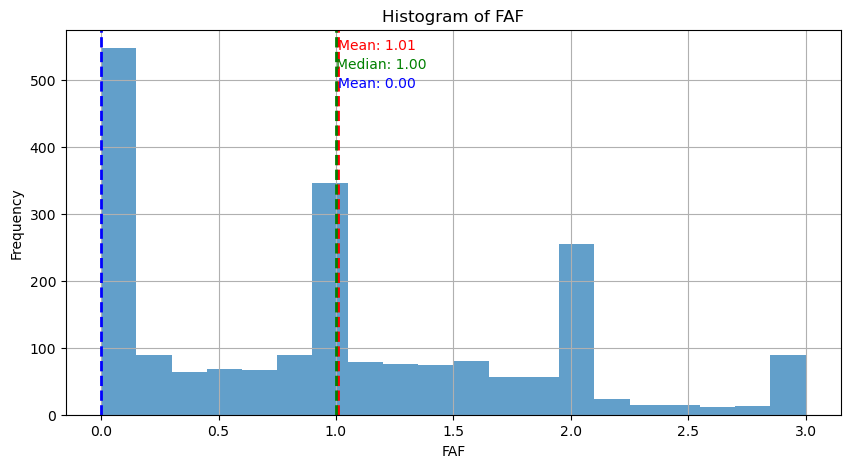

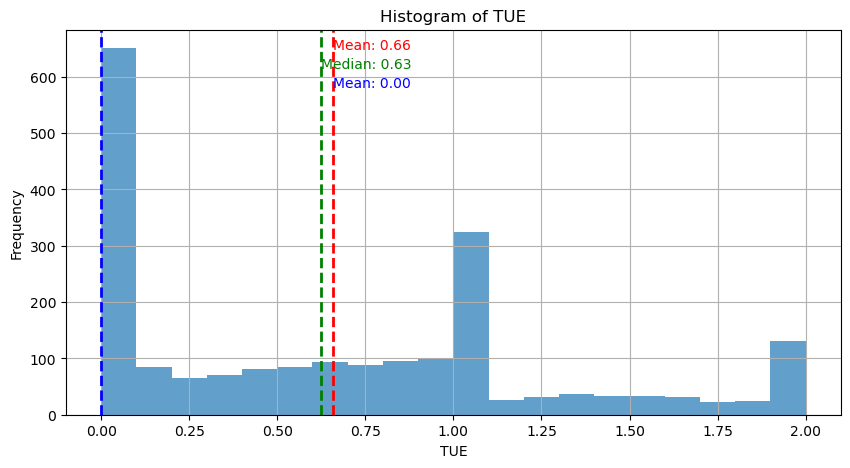

In [5]:
for feature in df_knn.columns:
    # Skipping Non-Numeric Features for Histogram Plotting
    if df_knn[feature].dtype == 'object': 
        continue ## In pandas, 'OBJECT' is used to check Non-Numeric columns (text or mixed types)
        
    # Calculate mean, median, and mode
    mean = df_knn[feature].mean()
    median = df_knn[feature].median()
    mode = df_knn[feature].mode().get(0, np.nan) ## mode() returns a series

    # Create a Histogram
    plt.figure(figsize = (10, 5))
    df_knn[feature].hist(bins = 20, alpha = 0.7)

    # Add lines for mean, median, and mode
    plt.axvline(mean, color = 'red', linestyle = 'dashed', linewidth = 2) ## Plot MEAN
    plt.axvline(median, color = 'green', linestyle = 'dashed', linewidth = 2) ## Plot MEDIAN
    plt.axvline(mode, color = 'blue', linestyle = 'dashed', linewidth = 2) ## Plot MODE
    
    # Add annotations for mean, median, and mode
    plt.text(mean, plt.ylim()[1] * 0.95, f'Mean: {mean:.2f}', color ='red') ## Annotate MEAN
    plt.text(median, plt.ylim()[1] * 0.90, f'Median: {median:.2f}', color ='green') ## Annotate MEDIAN
    plt.text(mean, plt.ylim()[1] * 0.85, f'Mean: {mode:.2f}', color ='blue') ## Annotate MODE

    # Add Title and Labels
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Show the Plot
    plt.show()

### ***-->> `Analysing Feature Interaction in the Obesity Dataset`***

#### ***`Context:`*** *After exploring individual feature distributions in the Obesity dataset, our next objective is to examine the interactions between these features. Understanding the relationships between different features can provide insights into the dataset's structure and inform the feature selection process, especially for machine learning algorithms that are sensitive to multicollinearity, such as kNN.*

#### ***`Task:`*** *Our task is to create and analyse a correlation matrix for the numerical features in the Obesity dataset. This matrix will help you identify how different features are related and determine if there are any pairs of features that exhibit a high degree of correlation.*

#### ***`Instructions:`*** *Compute the correlation matrix for the numerical features in the Obesity dataset. Visualise this correlation matrix using a heatmap to facilitate easier identification of relationships between features. Analyse the heatmap to identify any notable correlations between features. Pay particular attention to features with high correlation coefficients, as these relationships are particularly impactful.*

#### ***`Question:`*** *Based on our correlation matrix analysis for the Obesity dataset, identify one pair of features that exhibit a high degree of correlation. Describe how this finding could influence the feature selection process for a kNN model. What might be the implications of including both of these highly correlated features in your kNN model?*

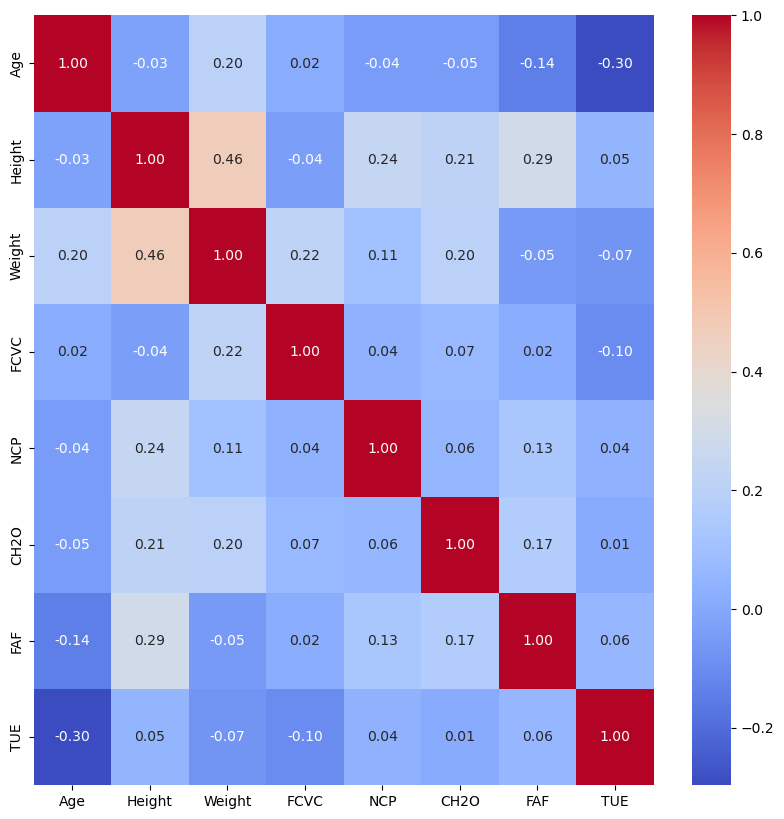

In [6]:
import seaborn as sns

# Compute the Correlation Matrix for Numerical Features
correlation_matrix = df_knn.select_dtypes(include = [np.number]).corr() ## Compute Correlation

# Visualize the Correlation Matrix using a Heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm') ## Plot the Heatmap

# Show the Plot
plt.show()

### ***-->> `Know Your Data`***

#### ***`Context:`*** *Effective data analysis often requires identifying which features in a dataset contain the most outliers and which have the largest range of values. This insight is crucial for optimizing machine learning algorithms, particularly those like kNN, which are sensitive to outliers and the scale of data.*

#### ***`Task:`*** *Determine which feature in our dataset has:*
#### *01: The highest number of outliers* and
#### *02: The largest range of values.*
#### **These characteristics are key to understanding data distribution and preparing for accurate modeling.**

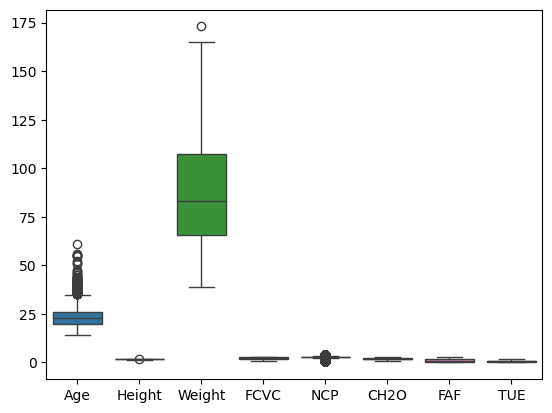

In [7]:
sns.boxplot(data = df_knn)
plt.show()

### ***-->> `Euclidean Distance Code`***

#### ***`Context:`*** *Understanding the concept of Euclidean distance is essential in machine learning, particularly in algorithms like kNN. This distance measure plays a crucial role in determining the similarity between data points.*

#### ***`Task:`*** *Write Python code to standardise a dataset and calculate the Euclidean distance between the first and last data points using specific features. This exercise will help us grasp the practical application of Euclidean distance in data preprocessing and similarity measurement.*

#### ***`Instructions:`***
#### **01:** *Select the subset of the entire dataset with only two features 'FCVC' and 'FAF.*
#### **02:** *Use StandardScaler to standardize this subset dataset.*
#### **03:** *Define a function to calculate the Euclidean distance between two data points using the 'FCVC' and 'FAF' features.*
#### **04:** *Calculate the Euclidean distance between the first and last data points in the entire scaled dataset.*

#### ***`Question:`*** *After standardizing the dataset and calculating the Euclidean distance between the first and last data points using 'FCVC' and 'FAF' features, within what range does the calculated distance fall?*

In [8]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

def calculate_euclidean_distance(data_point1, data_point2):
    # Try to remember the formula for euclidean distance
    distance = sqrt((data_point1['FCVC'] - data_point2['FCVC']) ** 2 + (data_point1['FAF'] - data_point2['FAF']) ** 2)
    return distance

df_scaler = StandardScaler()
scaled_data = df_scaler.fit_transform(df_knn[['FCVC', 'FAF']])
scaled_data_df = pd.DataFrame(scaled_data, columns = ['FCVC', 'FAF'])

# Select the FIST AND LAST Data point
first_data_point = scaled_data_df.iloc[0] 
last_data_point = scaled_data_df.iloc[-1] 

# Calculate the Euclidean Distance between FIRST and LAST data points
distance = calculate_euclidean_distance(first_data_point, last_data_point)
print(distance)

2.2285452530638006


### -->> ***`Implementing KNN Code`***

#### **`Context:`** *We're provided with a Python script implementing the k-Nearest Neighbors (kNN) algorithm from scratch. This script includes functions for calculating Euclidean distance and predicting the label of a new data point based on a set of labeled data.*

#### **`Task:`** *Complete the provided Python code by filling in the blanks to enable the kNN algorithm to predict the label of a new data point based on 'Gender', 'Age', 'Height', and 'Weight'.*

#### **`Question:`** *After completing and executing the code, what label does the kNN algorithm predict?*

In [9]:
original_df = df_knn.copy()

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import sqrt
from collections import Counter

# Function to Calculate Euclidean Distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return sqrt(distance)

# Function to Predict the Label of a New Data Point
def predict_label(train_data, new_data_point, num_neighbors):
    distances = []
    for _, row in train_data.iterrows():
        dist = euclidean_distance(new_data_point, row[:-1])
        distances.append((row, dist))
    distances.sort(key = lambda tup: tup[1])
    neighbors = [dist[0] for dist in distances[:num_neighbors]]

    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key = output_values.count)
    return prediction

# Encoding the 'Gender' column
label_encoder = LabelEncoder()
original_df['Gender'] = label_encoder.fit_transform(original_df['Gender'])

# Scaling the Features
scaler = StandardScaler()
original_df[['Age', 'Height', 'Weight']] = scaler.fit_transform(original_df[['Age', 'Height', 'Weight']])

# New Data Point
new_data = {'Gender': 'Male', 'Age': 32, 'Height': 175, 'Weight': 75}
new_data_df = pd.DataFrame([new_data])

# Encoding and Scaling the New Data Point
new_data_df['Gender'] = label_encoder.transform(new_data_df['Gender'])
new_data_scaled = scaler.transform(new_data_df[['Age', 'Height', 'Weight']])
new_data_point = [new_data_df['Gender'].iloc[0]] + new_data_scaled.tolist()[0]

# Predicting the Label
predicted_label = predict_label(original_df, new_data_point, 5)
print(f"The Predicted Label is: {predicted_label}")

C:\Users\deepe\AppData\Local\Temp\ipykernel_14872\725106968.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += (row1[i] - row2[i]) ** 2


The Predicted Label is: Obesity_Type_I


C:\Users\deepe\AppData\Local\Temp\ipykernel_14872\725106968.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  output_values = [row[-1] for row in neighbors]


## ***`-->> Predicting kNN Model Accuracy`***

#### **`Context:`** *We're tasked with implementing a k-Nearest Neighbors (kNN) classifier to predict a target variable in a dataset. Before diving into the code, it's crucial to understand the preprocessing steps involved, such as label encoding and feature scaling, which can significantly impact the model's performance*

#### **`Objective:`** *Write a Python script to preprocess the data, train a kNN model, and predict its test accuracy. You will use label encoding for categorical features and standard scaling for numerical features before training the model.*

#### **`Instructions:`**
#### ***`1: Label Encoding:`*** *Apply label encoding to convert all categorical features into numeric values. Use LabelEncoder from sklearn.preprocessing for this task.*

#### **`2: Feature and Target Selection:`** *Separate your features (X) and target variable (y).*

#### **`3: Data Splitting:`** *Split the data into training and testing sets using train_test_split from sklearn.model_selection. Set test_size to 0.33 and random_state to 42.*

#### **`4: Feature Scaling:`** *Standardize the features using StandardScaler from sklearn.preprocessing. Fit the scaler on the training set and transform both the training and testing sets.*

#### **`5: Model Training:`** *Initialize and train a KNeighborsClassifier from sklearn.neighbors with default parameters. Fit the model on the scaled training data.*

#### **`6: Model Evaluation:`** *Evaluate the model's accuracy on the scaled test set using the score method and print the result.*

#### ***`Question:`*** *After writing and executing the code, within what range does the kNN model's test accuracy fall?*

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Apply Label Encoding
label_encoder = LabelEncoder()
for column in df_knn.select_dtypes('object').columns:  ## Hint: Select Only Object Columns
    df_knn[column] = label_encoder.fit_transform(df_knn[column]) ## Hint: Fit and Transform the Categorical Column

X = df_knn.iloc[:, :-1] ## Features
y = df_knn.iloc[:, -1]  ## Target Variable

# Split the Data using train_test_split Function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Standardized the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) ## Hint: Fit and Transform the X_train Data
X_test_scaled = scaler.fit_transform(X_test) ## Hint: Only Transform the X_test Data

# Train the KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train) ## Hint: fit the model using X scaled and y_train

# Print the Accuracy
print(knn.score(X_test_scaled, y_test)) ## Hint: Check the Accuracy on Test Dataset

0.8106169296987088


## ***`-->> KNN - Distance Metrics`***

#### ***`Context:`*** *In this exercise, we will explore the impact of different distance metrics on the k-Nearest Neighbors (kNN) model's performance. By comparing the test accuracy of the kNN model using various distance metrics, we can identify which metric is most effective for this particular dataset.*

#### ***`Task:`*** *Implement a Python script to train and evaluate kNN models using different distance metrics. Our goal is to determine which distance metric leads to the highest test accuracy.

#### ***`Instructions:`***
**`1. Distance Metrics:`** *Define a list of distance metrics to evaluate – Euclidean, Manhattan, and Cosine.*

**`2. Model Training and Evaluation:`** *For each distance metric, train a kNN model on the scaled training data and evaluate its accuracy on the scaled test data.*

**`3. Accuracy Comparison:`** *Store and compare the accuracy scores for each metric to identify the most effective one.*

#### ***`Question:`*** *Based on the script, which distance metric provides the best test accuracy for the kNN model?*

In [12]:
## Import Accuracy Score
from sklearn.metrics import accuracy_score

## Define Different Distance Metrics
metrics = ['euclidean', 'manhattan', 'cosine']
scores = {}  # Changed from list to dictionary

## Training and Evaluating a KNN Model for each Distance Metrics
for metric in metrics:
    knn = KNeighborsClassifier(metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    scores[metric] = score  # Now we can use string keys with a dictionary
    print(f"Accuracy with {metric} distance: {score}")

## Determine the Best Performing Metric
best_metric = max(scores, key=scores.get)
print(f"The Best Performing Metric is {best_metric} with an ACCURACY of {scores[best_metric]}.")

Accuracy with euclidean distance: 0.8106169296987088
Accuracy with manhattan distance: 0.8694404591104734
Accuracy with cosine distance: 0.8034433285509326
The Best Performing Metric is manhattan with an ACCURACY of 0.8694404591104734.


## ***`-->> Bias-Variance in kNN`***

#### ***`Context:`*** *To understand the bias-variance trade-off in the k-Nearest Neighbors (kNN) algorithm, we'll analyze how kNN's accuracy varies with different k values. By plotting the training and testing accuracies on the same graph, we can visually assess how the model's bias and variance change as the complexity (determined by k) changes.

#### ***`Task:`*** *Implement Python code to train kNN models with a range of k values and plot the training and testing accuracies on a multi-line graph. This visualization will help us determine the optimal balance between bias and variance.

#### ***`Instructions:`***
**`1.Initialize Accuracy Lists:`** *Create two lists, train_acc and test_acc, to store the accuracies for training and testing sets, respectively.*

**`2.Training and Evaluation Loop:`** *Iterate k from 1 to 80, train a kNN model using the Manhattan metric for each k using the previously used scaled data, and append the accuracies to the corresponding lists.*

**`3.Plotting:`** *Use matplotlib to create a multi-line plot where the x-axis represents the K-VALUES, and the y-axis represents ACCURACY. Plot both train_acc and test_acc on this graph to create two distinct lines.*

**`4.Enhancing the Plot:`** 

***4.1 - Add a title to the plot: 'kNN Training and Testing Accuracies'.***

***4.2 - Label the x-axis as 'Number of Neighbors (k)' and the y-axis as 'Accuracy'.***

***4.3 - Insert a legend to differentiate between the training and testing accuracy lines.***

***4.4 - Use different colors for the two lines for clear visualization.***

#### ***`Question:`*** *After visualizing the training and testing accuracies for different k values, how do the trends in the plot help us understand the bias-variance trade-off in kNN?*

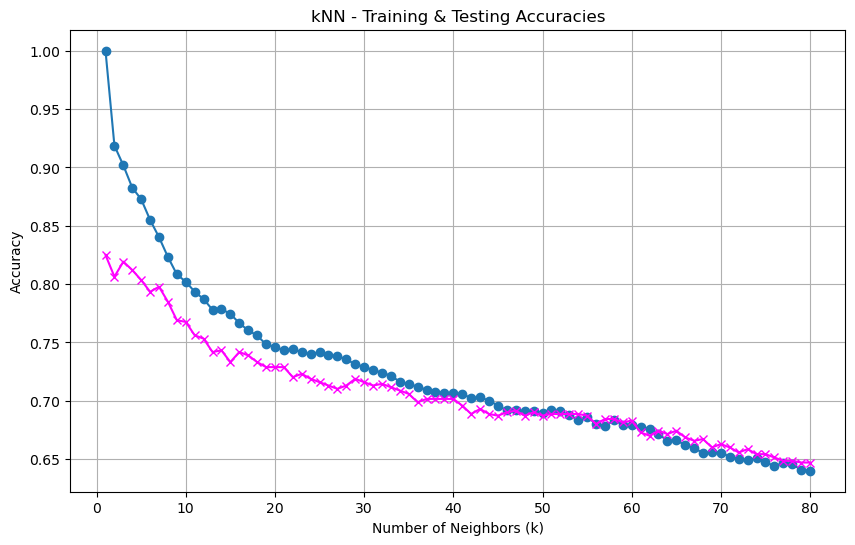

In [13]:
train_acc  = []
test_acc = []

for k in range(1, 81): ## Iterate Over 1 to 80
    KNN = KNeighborsClassifier(n_neighbors = k, metric = metric) ## Hint: Put appropriate HyperParameters
    KNN.fit(X_train_scaled, y_train)
    train_acc.append(KNN.score(X_train_scaled, y_train)) ## Hint: Score on Train Dataset
    test_acc.append(KNN.score(X_test_scaled, y_test))   ## Hint: Score on Test Dataset

plt.figure(figsize = (10, 6))
plt.plot(range(1, 81), train_acc, label = 'Training Accuracy', marker = 'o') ## Plot Train Accuracies
plt.plot(range(1, 81), test_acc, label = 'Testing Accuracy', color = 'magenta', marker = 'x') ## Plot Test Accuracies
plt.title('kNN - Training & Testing Accuracies')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid()

plt.show()

## ***`-->> Optimizing kNN with Cross-Validation`***

#### ***`Context:`*** *We're tasked with writing Python code to determine the optimal k value for a k-Nearest Neighbors (kNN) classifier using cross-validation. This method will help us understand how different k values influence the model's predictive performance.*

#### ***`Task:`*** *Write a Python script to find the optimal k value for a kNN classifier by testing a range of k values and evaluating their performance using cross-validation. Then, assess the chosen k value's performance on a test set.*

#### ***`Instructions:`*** 
**`01: Define the Range for k:`** *Set up a range of k values from 2 to 10.*

**`02: Cross-Validation Loop:`** *Iterate through the k values, initializing a KNeighborsClassifier for each. Perform 5-fold cross-validation on the scaled training data and compute the mean accuracy for each k.*

**`03: Identify the Best k:`** *Determine which k value yields the highest mean cross-validation accuracy.*

**`04: Test Set Evaluation:`** *Train a new kNN model using the best k value on the entire training set. Then, evaluate this model on the test set to obtain the test accuracy.*

**`05: Code Execution:`** *Execute your script to discover the optimal k value and its corresponding test set accuracy.*

#### ***`Question:`*** *Based on your script execution, what is the outcome for the optimal k value and its test set accuracy?*

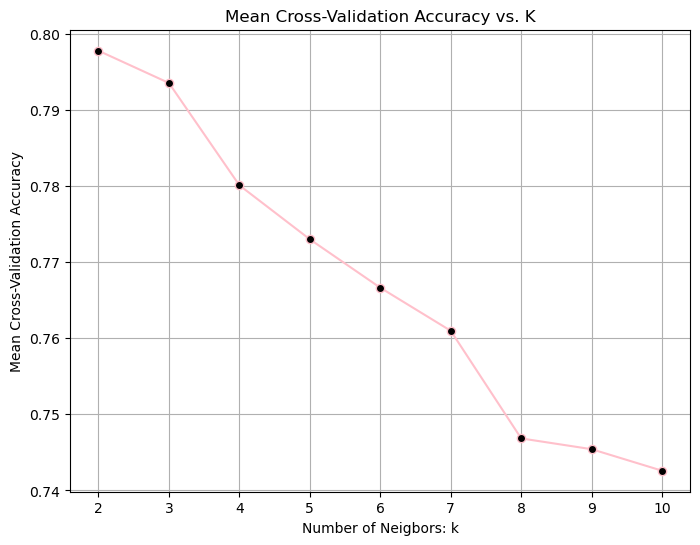

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Array to score mean cross-validation scores
mean_cv_scores = []

# Define the range of k-values to try
k_values = np.arange(2, 11)

for k in k_values: # Loop over each value of k
    knn = KNeighborsClassifier(n_neighbors = k, metric = metric) # Initialize the kNN classifier with the current k value
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv = 5) # Perform 5-fold cross validation 
    mean_cv_scores.append(np.mean(cv_scores)) # Calculate the mean of the cross validation scores

plt.figure(figsize = (8, 6))
plt.plot(k_values, mean_cv_scores, marker = 'o', color = 'pink', markerfacecolor = 'black') # Plotting the mean cross-validation scores for each k-value
plt.title('Mean Cross-Validation Accuracy vs. K')
plt.xlabel('Number of Neigbors: k')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)

plt.show()    

In [15]:
best_k = k_values[np.argmax(mean_cv_scores)] # Identify the k values with the highest mean cross-validation accuracy from the plot
print(f"The Best Value of K is: {best_k} with a Cross-Validation Accuracy of: {max(mean_cv_scores):.2f}")

knn_best = KNeighborsClassifier(n_neighbors = best_k, metric = 'manhattan')
knn_best.fit(X_train_scaled, y_train) # Training the Model on Train Dataset with the Best K Value
test_accuracy = knn_best.score(X_test_scaled, y_test) # Evaluate Model Performance on Test Set
print(f"Test Set Accuracy with the Best-K: {test_accuracy}")


The Best Value of K is: 2 with a Cross-Validation Accuracy of: 0.80
Test Set Accuracy with the Best-K: 0.8694404591104734


***`-->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<-- -->#*#<--`*** 

### ***`-->> Covariance vs Correlation`***

#### ***`Context:`*** *In the field of statistics and data science, grasping the differences between covariance and correlation is crucial for analysing relationships between two variables. Both metrics serve to indicate how variables change together, yet they offer distinct perspectives and interpretative values.*

#### ***`Question:`*** *Which of the following statements correctly defines covariance and correlation?*

#### Statements to Evaluate:
**`S1:`** Covariance measures how two variables change together, but its value is influenced by the scale of the variables, making it hard to interpret the strength of their relationship.

**`S2:`** Correlation is a normalized measure of covariance, providing a dimensionless value that indicates the strength and direction of a linear relationship.

**`S3:`** Correlation measures both linear and non-linear relationships between variables.

**`S4:`** Covariance and correlation both provide identical information about the direction and strength of the relationship between variables.

### ***Options:***
***`A) S1 and S2`***

B) S1 and S3

C) S2 and S4

D) S3 and S4

### ***`-->> Select NearestNeighbor`***

#### ***`Question:`*** *Suppose you are using kNN with `k = 1` and have `2 features: height and weight`. Then what will be the class for the query point?*
<p><img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/067/632/original/Screenshot_2024-03-01_at_11.23.08_AM.png?1709993067" alt="" width="473" height="338" /></p>

### ***Options:***
***`A) Normal Weight`***

B) Obesity_Type_II

C) Either Normal Weight or Obesity_Type_II

D) Cannot be Determined

### ***`->> Know about kNN`***

#### **Question** *As kNN is a Non-parametric Algorithm, when is it helpful?*

### ***`Options:`***
***`A) Nonparametric methods are commonly used when we want a few assumptions in our data`***

B) Nonparametric methods are commonly used when we want a lot of assumptions in our data

C) Nonparametric methods are commonly used when we want outliers in data

D) None of the above

### ***`-->>Scaling in kNN`***

#### ***`Question:`*** *Select the statements which are correct regarding the importance of scaling in kNN:*

#### ***`Statements:`***
**`S1:`** *Scaling is important in kNN because it ensures that all features contribute equally to the distance computation.*

**`S2:`** *Unscaled features can disproportionately influence the distance calculations, affecting the performance of kNN.*

**`S3:`** *Scaling prevents features from having negative values.*

**`S4:`** *Scaling decreases the sample size of our data.*

### ***`Options:`***
***`A]  S1 and S2`***

B]     S1, S2, and S3

C]    S2 and S4

D]    S1, S2, and S4

### ***`-->> kNN Properties`***

#### **`Context:`** *The k-Nearest Neighbors (kNN) algorithm is widely used in machine learning for its simplicity and effectiveness. However, it has certain characteristics and challenges, especially related to dimensionality, distance measures, noise, and the choice of k.*

#### **`Question:`** *Which of the following statements is/are correct regarding the kNN algorithm?*

#### **`Statements:`**
**`S1:`** *As the number of features increases, the requirement for data points increases exponentially.*

**`S2:`** *With increasing dimensions, the Euclidean distance loses its significance.*

**`S3:`** *kNN is sensitive to noise and has high time complexity, particularly because it does not learn a discriminative function from the training data but uses the entire dataset for prediction.*

**`S4:`** *A lower value of k in kNN can lead to overfitting, as the predictions become more sensitive to the noise in the training data.*

### ***`Options:`***

A] S1, S2, and S3

B] S1 and S2

C] S1, S3, and S4
  
***`D] All of the Statements`***